In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import scipy
import datetime

In [2]:
p = '/Users/jenifervivar/Documents/GitHub/NOAA_PBLH/Data/HREF_mixht.csv'
df = pd.read_csv(p)
#print(df.head())
date = df['date']
df.drop('date', inplace = True, axis = 1)
df.index = pd.to_datetime(date)
df.head(20)

,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10
date,,,,,,,,,,
2022-05-14 01:00:00,187.4,223.0,319.8,449.1,74.17,241.40,50.05,122.9,284.1,153.00
2022-05-14 02:00:00,401.1,158.6,196.0,647.1,79.01,199.90,54.15,185.2,420.8,256.20
2022-05-14 03:00:00,260.9,171.3,352.3,480.9,116.90,321.80,119.00,210.9,338.1,357.70
2022-05-14 04:00:00,251.4,296.1,464.9,352.3,112.60,293.00,174.80,269.7,322.8,217.20
2022-05-14 05:00:00,252.8,242.6,491.8,330.6,229.00,191.60,193.80,194.0,295.5,261.90
2022-05-14 06:00:00,212.6,181.2,448.0,411.7,227.80,121.00,123.80,207.5,236.6,233.50
2022-05-14 07:00:00,254.4,163.4,473.7,448.7,179.80,153.60,117.70,159.2,206.7,183.30
2022-05-14 08:00:00,165.7,154.7,492.8,453.6,96.35,79.96,187.40,211.4,203.2,164.00
2022-05-14 09:00:00,133.4,147.0,464.3,480.5,93.94,54.18,142.60,171.3,232.0,158.60


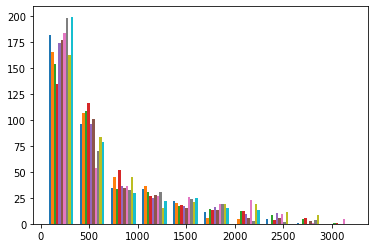

In [13]:
plt.hist(df)
plt.show()

In [3]:
df.dtypes

m01    float64
m02    float64
m03    float64
m04    float64
m05    float64
m06    float64
m07    float64
m08    float64
m09    float64
m10    float64
dtype: object

In [5]:
p= "/Users/jenifervivar/Desktop/HALO_DATA/May_2022HALO_data/BLHStats_202205.nc"
#dfmean = halodf.resample('1H').mean()
data = xr.open_dataset(p)
df_pbl = data.to_dataframe()
df_pbl["yDay"] =  pd.to_datetime(df_pbl['yDay'], unit='D', origin=pd.Timestamp('2022-01-01')).round('T')
df_pbl.reset_index()
df_pbl.index = df_pbl['yDay']
#print(df_pbl)
df_pbl = df_pbl.resample('1H').mean()
df_pbl = df_pbl['Height']
df_pbl.head()

yDay
2022-05-11 00:00:00   NaN
2022-05-11 01:00:00   NaN
2022-05-11 02:00:00   NaN
2022-05-11 03:00:00   NaN
2022-05-11 04:00:00   NaN
Freq: H, Name: Height, dtype: float64

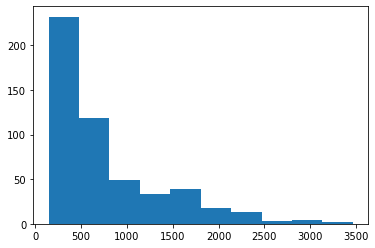

In [8]:
plt.hist(df_pbl)
plt.show()

In [19]:
com_df = pd.concat([df, df_pbl], axis = 1, join ='inner', verify_integrity=True)
com_df.rename(columns = {'Height':'obs'}, inplace = True)
com_df.head()

,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,obs
2022-05-14 01:00:00,187.4,223.0,319.8,449.1,74.17,241.4,50.05,122.9,284.1,153.0,445.000000
2022-05-14 02:00:00,401.1,158.6,196.0,647.1,79.01,199.9,54.15,185.2,420.8,256.2,375.000000
2022-05-14 03:00:00,260.9,171.3,352.3,480.9,116.90,321.8,119.00,210.9,338.1,357.7,558.333333
2022-05-14 04:00:00,251.4,296.1,464.9,352.3,112.60,293.0,174.80,269.7,322.8,217.2,508.333333
2022-05-14 05:00:00,252.8,242.6,491.8,330.6,229.00,191.6,193.80,194.0,295.5,261.9,441.666667


The principle behind the rank histogram is quite simple. Ideally, one property that is desired from an EF is reliable probabilities; if ensemble relative frequency suggests P percent probability of occurrence, the event truly ought to have P probability of occurring. For this probability to be reliable, the set of ensemble member forecast values at a given point and the true state (the verification) ought to be able to be considered random samples from the same probability distribution. This reliability then implies in turn that if an n-member ensemble and the verification are pooled into a vector and sorted from lowest to highest, then the verification is equally likely to occur in each of the n + 1 possible ranks. If the rank of the verification is tallied and the process repeated over many independent sample points, a uniform histogram over the possible ranks should result.

When the ensemble samples are from a distribution with a lack of variability, a U-shaped rank histogram results. 
An excess of variability in the ensemble overpopulates the middle ranks. Bias (+/−) exessively populates the (left/right) extreme ranks.

In [15]:
import rank
test = rank.Talagrand(thresh=0,nbins=11)

In [20]:
test.add_data(com_df)

['obs']


In [21]:
test.binra

array([ 41.,  18.,  17.,  22.,  16.,  22.,  18.,  23.,  45.,  37., 124.])

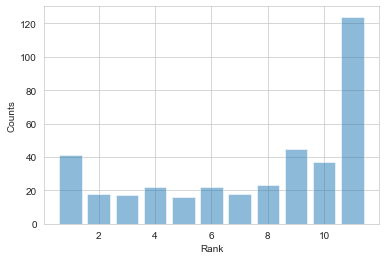

In [22]:
test.plotrank()

multi-
category reliability diagram (MRCD)

<function matplotlib.pyplot.show(close=None, block=None)>

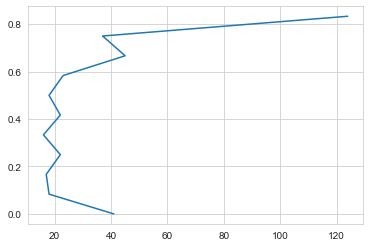

In [25]:
r = test.binra
abcissa = np.array([j/(len(r)+1) for j in range(len(r))])
plt.xlabel('Rank histogram')
plt.plot(r, abcissa)
plt.show()

Define D as the difference in ranks between the two samples in an n-member ensemble. The expected value for the probability P(D) of the difference is

            (n + 1 - |D|) /(n+1)^2 if |D| < (n+1)
P(D) =      
            0,  otherwise
            
            
Generate an (n + 1) *(n + 1) array, and populate each array element with the row number minus the column number. The row number represents possible ranks of the first sample, the column number the ranks of the second, and the value assigned to a particular element is the difference in ranks between the two samples. Count the fraction of array elements with a particular D and (5) will result by inspection.

In [32]:
com_df.shape

(383, 11)

In [35]:
from ranky import rankz
obs = com_df['obs']
ensemble = com_df
mask = np.random.randint(0, 2, (com_df.shape)) #masked where 0/false.

print(mask)
result = rankz(obs, ensemble, mask)
#result = rankz(obs, ensemble, mask)

# plot histogram
plt.bar(range(1, ensemble.shape[0]+2), result[0])

# view histogram
plt.show()

[[1 1 1 ... 0 1 1]
 [0 0 0 ... 0 1 0]
 [1 1 1 ... 1 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 1 1]
 [1 0 0 ... 0 0 1]]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

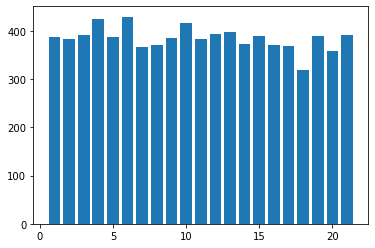

In [14]:
import numpy as np
from ranky import rankz
import matplotlib.pyplot as plt

# generate dummy data with 10 timesteps, 40 lat and lon grid cells, and 20 ensemble members. 
obs = np.random.randn(10, 40, 40)
ensemble = np.random.randn(20, 10, 40, 40)
mask = np.random.randint(0, 2, (10, 40, 40)) #masked where 0/false.

# feed into rankz function
result = rankz(obs, ensemble, mask)

# plot histogram
plt.bar(range(1,ensemble.shape[0]+2), result[0])

# view histogram
plt.show()

In [28]:
obs.shape

(10, 40, 40)

In [30]:
ensemble.shape

(20, 10, 40, 40)

In [29]:
obs

array([[[-4.56603957e-01, -1.38177996e+00,  2.10338316e+00, ...,
         -9.08706357e-01, -1.57132087e+00,  1.05647743e+00],
        [ 4.52519475e-01, -9.18229253e-01, -8.19152384e-01, ...,
         -7.55416147e-01,  1.64763371e+00,  3.47049777e-01],
        [ 1.15337246e+00,  1.83370891e+00,  2.80806716e-03, ...,
          1.26438403e+00,  4.07440680e-01, -1.10778020e+00],
        ...,
        [ 1.00542266e+00, -1.32932590e+00,  2.15341848e-01, ...,
         -2.09900747e+00,  7.09146036e-01, -2.11950494e-01],
        [-8.53547386e-01,  7.64095849e-01,  3.09385691e-01, ...,
         -2.27231501e+00, -6.29205928e-01,  7.81076243e-01],
        [-3.05220732e-01, -2.01780941e+00, -6.42486927e-01, ...,
         -8.00695699e-01,  1.37526990e+00, -2.78864818e-01]],

       [[-2.17028852e-01,  9.99715876e-01,  9.72058897e-02, ...,
          1.29283832e-01,  2.03164421e-02,  1.67497665e+00],
        [-1.62223629e-02,  2.55260050e+00, -1.46379581e+00, ...,
         -7.18234841e-01,  4.40543942e

In [26]:
mask = np.random.randint(0, 2, (10, 40, 40)) 

In [27]:
mask = np.random.randint(0, 2, (10, 40, 40)) #masked where 0/false.
mask

array([[[1, 1, 0, ..., 1, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 1, ..., 0, 1, 0],
        ...,
        [1, 1, 0, ..., 0, 1, 0],
        [0, 0, 1, ..., 1, 0, 1],
        [0, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 1, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        [0, 0, 1, ..., 1, 0, 1]],

       [[1, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 1],
        ...,
        [1, 1, 0, ..., 1, 0, 1],
        [0, 0, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1]],

       ...,

       [[0, 0, 1, ..., 0, 1, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 1, 0],
        ...,
        [1, 1, 1, ..., 0, 1, 1],
        [1, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 1, 0, ..., 1, 1, 1],
        [1, 0, 1, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 0, 0],
        ...,
        [1, 0, 0, ..., 

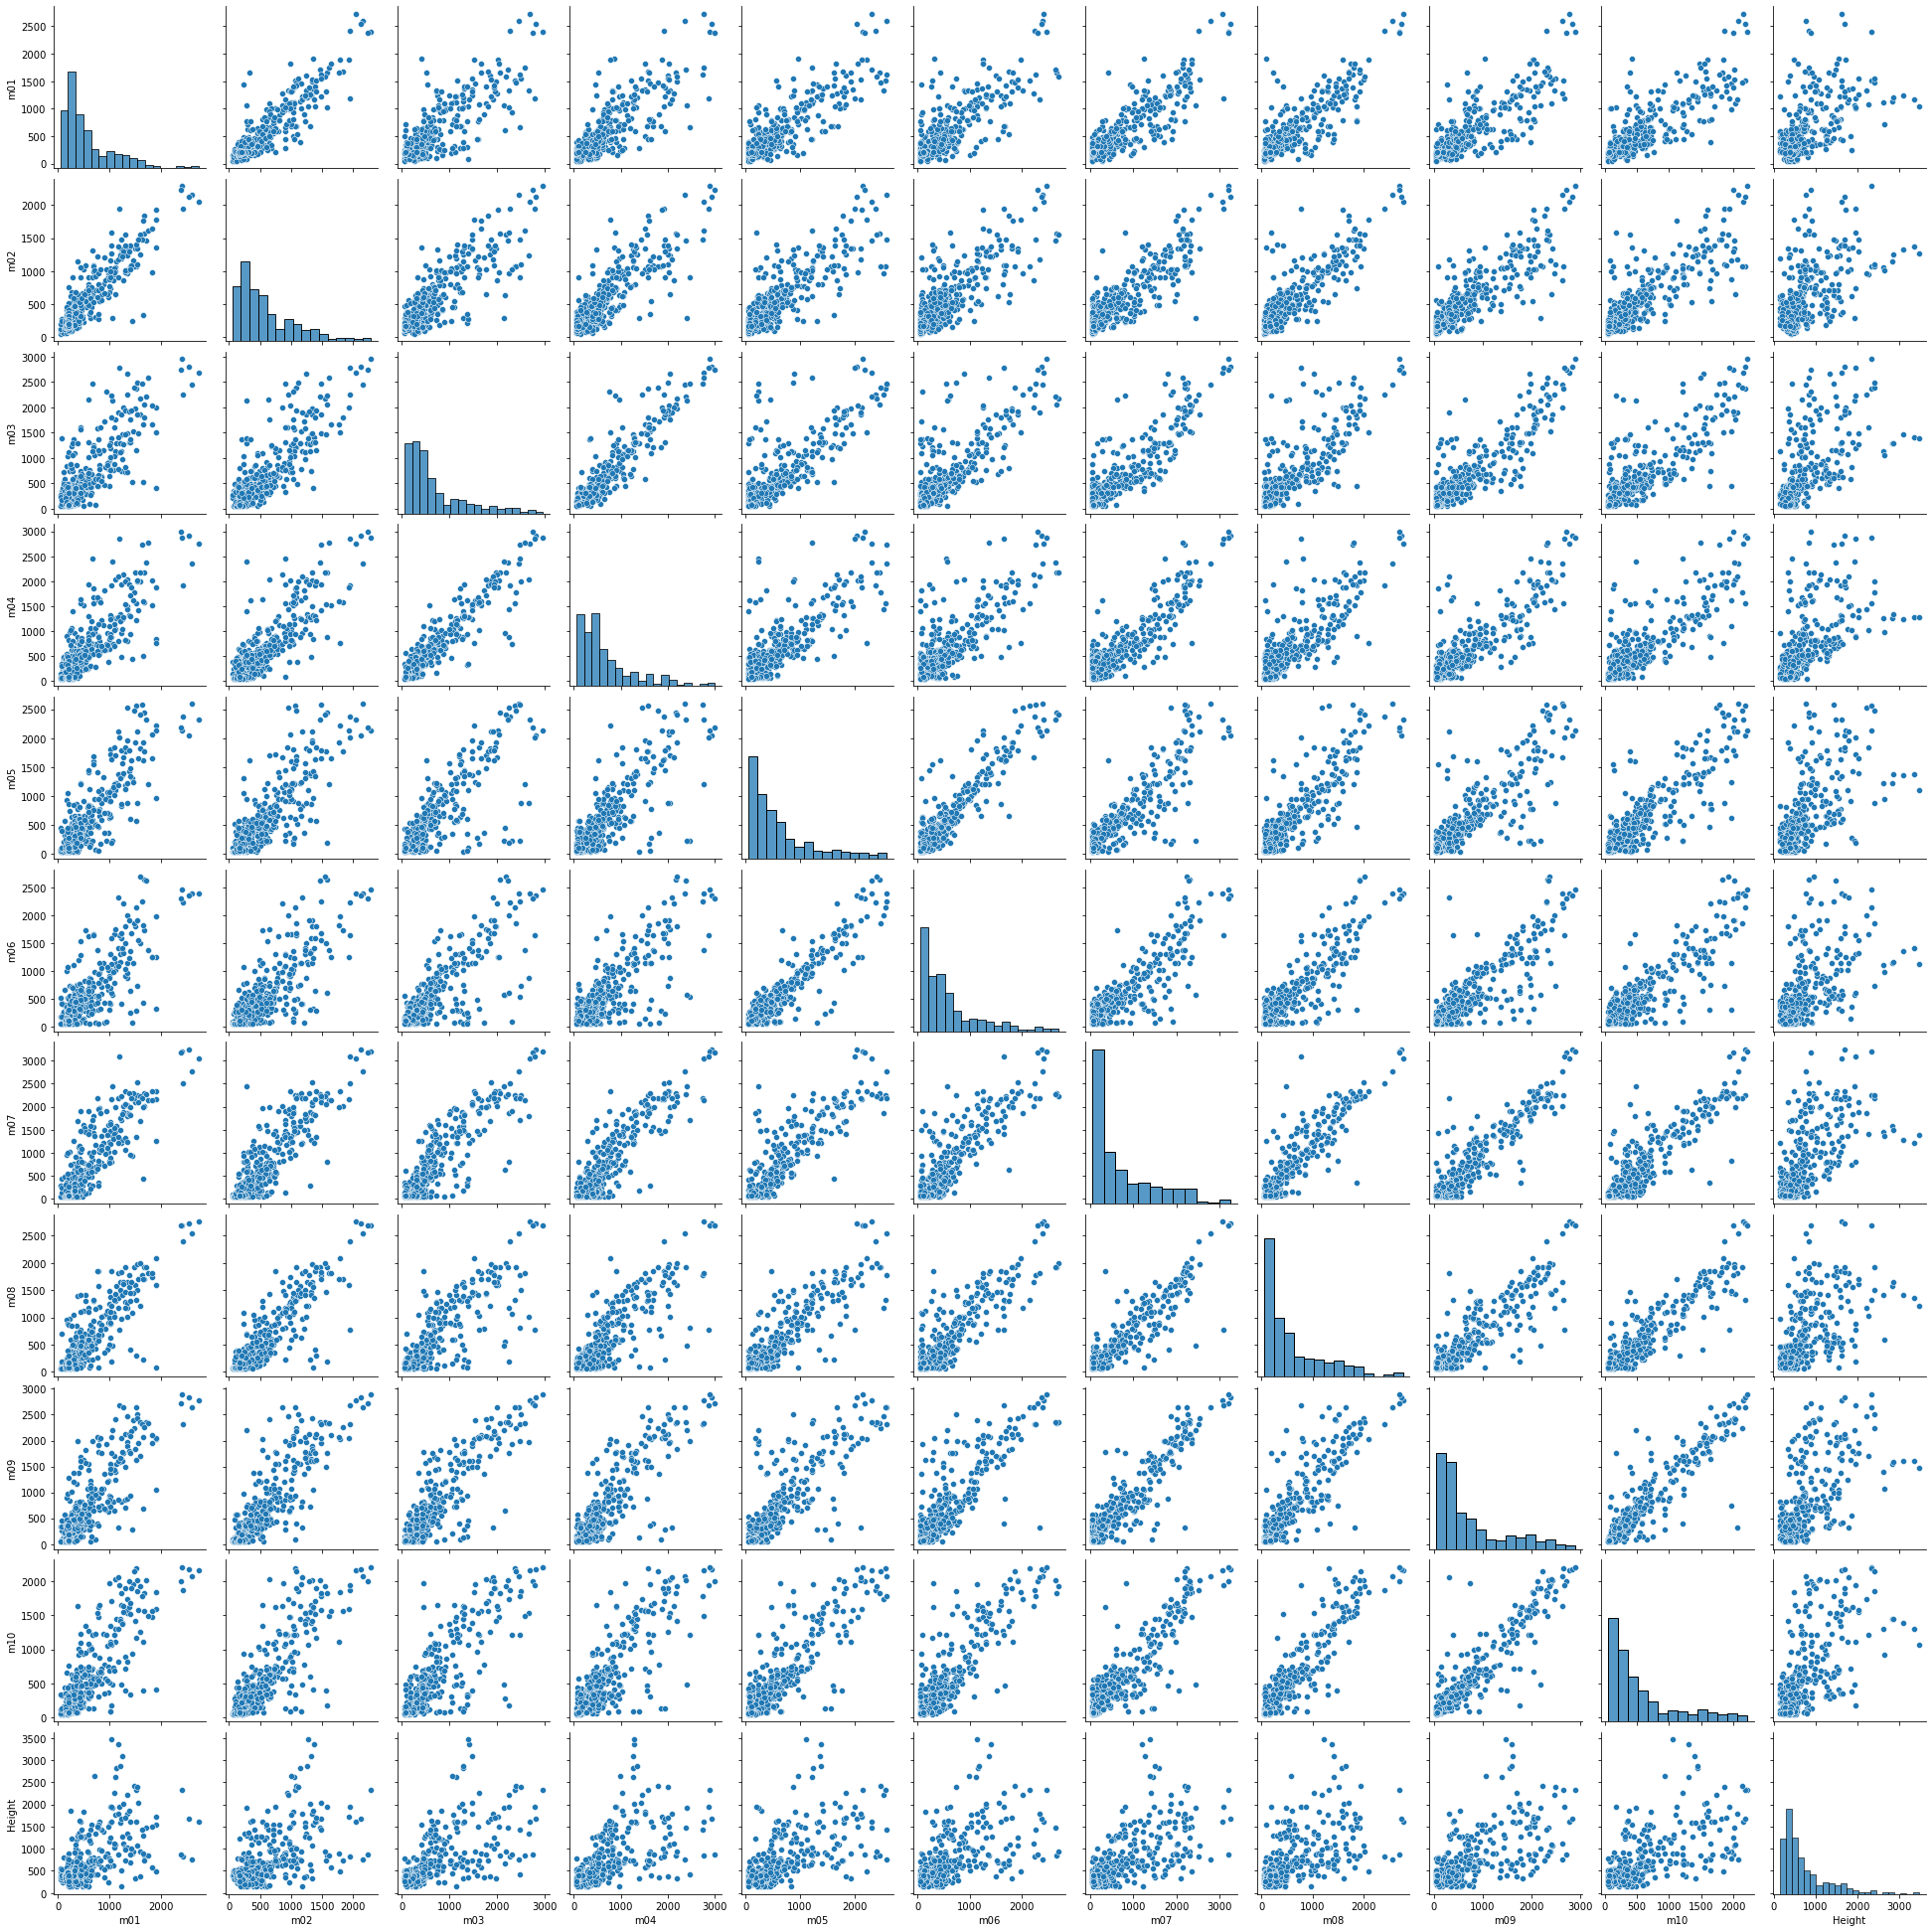

In [8]:
sns.pairplot(com_df)

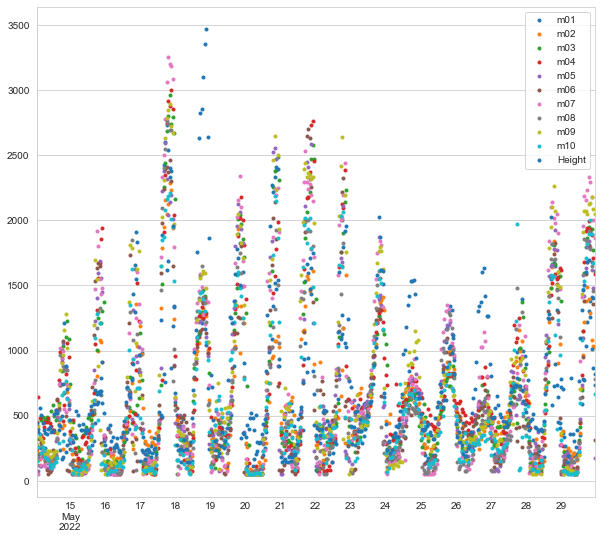

In [25]:
sns.set_style('whitegrid')
com_df.plot( style='.', figsize = (10,10))
fig = plt.gcf()
fig.autofmt_xdate()